# Overview


# References
https://leetcode.com/problems/rotate-string/editorial/
https://www.cs.ucdavis.edu/~gusfield/strmat.html


# Solution

Approach #3: Rolling Hash [Accepted]
Intuition

Our approach comes down to quickly checking whether want to check whether B is a substring of A2 = A+A. Specifically, (if N = A.length) we should check whether B = A2[0:N], or B = A2[1:N+1], or B = A2[2:N+2] and so on. To check this, we can use a rolling hash.

Algorithm

For a string S, say hash(S) = (S[0] * P**0 + S[1] * P**1 + S[2] * P**2 + ...) % MOD, where X**Y represents exponentiation, and S[i] is the ASCII character code of the string at that index.

The idea is that hash(S) has output that is approximately uniformly distributed between [0, 1, 2, ..., MOD-1], and so if hash(S) == hash(T) it is very likely that S == T.

Now say we have a hash hash(A), and we want the hash of A[1], A[2], ..., A[N-1], A[0]. We can subtract A[0] from the hash, divide by P, and add A[0] * P**(N-1). (Our division is under the finite field FMOD\mathbb{F}_\text{MOD}F 
MOD
  - done by multiplying by the modular inverse Pinv = pow(P, MOD-2, MOD).)
  
Complexity Analysis

Time Complexity: O(N)O(N)O(N), where NNN is the length of A.

Space Complexity: O(N)O(N)O(N), to perform the final check A_rotation == B.

In [107]:
import matplotlib.pyplot as plt
from collections import Counter

In [399]:
class RollingHash:
    
    def __init__(self):
        self.mod = 10**9 + 7
#         self.p = ord('z') - ord('a') # 25
        self.p = 10
    
    def _hash(self, val: str) -> int:
        res = 0
        m = len(val)
        p = 1
        for i in reversed(range(m)):
            v = val[i]
            code = (ord(v) - 96) % self.mod
            res += code * p
            p *= self.p
        return res % self.mod
    
    def _roll_hash(self, prev_hash: int, v: str, p2: int) -> int:
        print(f"_roll_hash prev_hash:{prev_hash} v:{v} p2:{p2}")
        code = ord(v) - 96
        return (self.p * (prev_hash - code*p2) + code) % self.mod
    
    def is_rotate_str(self, s: str, p: str) -> bool:
        n = len(s)
        if len(p) != n:
            print(f"wrong length len_p:{len(p)} n:{n}")
            return False

        p_hash = self._hash(p)        
        p2 = self.p ** (n-1)

        s_hash = self._hash(s)
        print(f"init s_hash: {s_hash} p_hash: {p_hash}")
        if p_hash == s_hash and p == s:
            return True

        for i in range(n):
            v = s[i]
            code = ord(v) - 96
            s_hash = self._roll_hash(s_hash, v, p2)
            s2 = s[i+1:] + s[:i+1]
            assert s_hash == self._hash(s2), f"[{s2}] {s_hash} != {self._hash(s2)}"
            print(f"[{i}-{v}] s_hash:{s_hash} p_hash:{p_hash}")

            
            if s_hash == p_hash:

                if s2 == p:
                    return True
            
#             if ha == hb and A[i+1:] + A[:i+1] == B:
#                 return True

        return False

# assert RollingHash()._hash('abc') == 123
# assert RollingHash()._roll_hash(123, 'a', 10**2) == 231

# abc
# bca, cab, abc

In [401]:
RollingHash().is_rotate_str("clrwmpkwru", "wmpkwruclr")

init s_hash: 404473473 p_hash: 473501270
_roll_hash prev_hash:404473473 v:c p2:1000000000
[0-c] s_hash:44734915 p_hash:473501270
_roll_hash prev_hash:44734915 v:l p2:1000000000
[1-l] s_hash:447350002 p_hash:473501270
_roll_hash prev_hash:447350002 v:r p2:1000000000
[2-r] s_hash:473501270 p_hash:473501270


True

In [321]:
assert RollingHash()._hash('abc') == 123

assert RollingHash()._hash('bca') == 231
assert RollingHash()._roll_hash(123, 'a', 100) == 231

assert RollingHash()._hash('cab') == 312
assert RollingHash()._roll_hash(231, 'b', 100) == 312

In [322]:
RollingHash().is_rotate_str('abc', 'bca')

init s_hash: 123 p_hash: 231
[0 a] s_hash:123 p_hash: 231 p2:100 ps: bca p: bca
[1 b] s_hash:123 p_hash: 312 p2:100 ps: cab p: bca


False

In [326]:
'''
abc   
 bca
  cab
'''

RollingHash()._hash('abc'), RollingHash()._hash('bca'), RollingHash()._hash('cab')

(123, 231, 312)

In [283]:
# assert RollingHash()._hash('abc') == 123

# assert RollingHash()._hash('bca') == 231
# assert RollingHash()._roll_hash(123, 'a', 100) == 231

# assert RollingHash()._hash('cab') == 312
# assert RollingHash()._roll_hash(231, 'b', 100) == 312

[0 a] s_hash:12997 p_hash: 25765 p2:12769
[1 b] s_hash:12997 p_hash: 25653 p2:12769
[2 b] s_hash:12997 p_hash: 12997 p2:12769


True

231

In [176]:
RollingHash()._hash('bc')

(1925, 625)

In [177]:
RollingHash()._hash('b')

(50, 25)

In [171]:
RollingHash().has_rotate_str('bcda', 'abcd')

s_hash: 455050 power: 390625
[0 b] s_hash: 440049455 1610650
[1 c] s_hash: 577648857 1610650
[2 d] s_hash: 863168460 1610650
[3 a] s_hash: 554542367 1610650


False

In [172]:
RollingHash()._hash('bcda')

(455050, 390625)

In [173]:
RollingHash()._hash('abcd')

(1610650, 390625)

In [174]:
RollingHash()._hash('bcd')

(64425, 15625)

In [147]:
#'abc'
# 1 + 2*25 + 3*25**2
RollingHash()._hash('abc')

1926

In [149]:
1 + 2*25 + 3*25**2

1926

In [151]:
RollingHash()._hash('bc')

77

In [150]:
#'bc'
# 2*25 + 3*25**2
h = 1926
h - (ord('a') - 96)

1925

In [43]:
# 'ab' -> 1*1 + 2*25=51

#  abc -> 1+2*51+3*25*2=51+676=1926

In [44]:
3*25**2+51

1926

In [45]:
ord('z') - ord('a')

25

In [49]:
chr(0+97+25)

'z'

In [121]:
data = []
for v in Perm(2).get_permutations():
    data.append(RollingHash().hash(v))

len(data)

625

In [122]:
hash_frq = Counter()
for v in data:
    frq = hash_frq.get(v, 0)
    frq += 1
    hash_frq[v] = frq

hash_frq.most_common(20)

[(26, 1),
 (51, 1),
 (76, 1),
 (101, 1),
 (126, 1),
 (151, 1),
 (176, 1),
 (201, 1),
 (226, 1),
 (251, 1),
 (276, 1),
 (301, 1),
 (326, 1),
 (351, 1),
 (376, 1),
 (401, 1),
 (426, 1),
 (451, 1),
 (476, 1),
 (501, 1)]

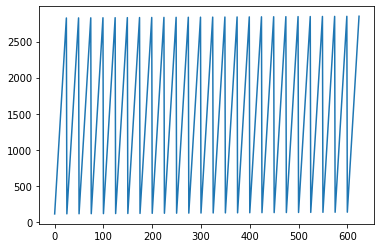

In [103]:
plt.plot(data)

In [89]:
import math

In [99]:
(25**3 - 1) / 24

651.0

In [95]:
class Perm:
    
    def __init__(self, n: int):
        self.n = n
        self.res = []
    
    def is_a_solution(self, a, k) -> bool:
        return k >= (self.n - 1)
    
    def process_solution(self, a, k):
        self.res.append(''.join(a[:k+1]))

    def construct_candidates(self, a, k):
        res = []
        for i in range(25):
            res.append(chr(ord('a') + i))
        return res
        
    def backtrack(self, a, k):
        if self.is_a_solution(a, k):
            self.process_solution(a, k)
        else:
            k += 1
            c = self.construct_candidates(a, k)
            for cv in c:
                a[k] = cv
                self.backtrack(a, k)

    def get_permutations(self):
        a = [None] * self.n
        self.backtrack(a, -1)
        return self.res
                
len(Perm(2).get_permutations())

625